In [1]:
import pandas as pd

path = '../data/bicycle/sample_NoNA.csv'


df = pd.read_csv(path, encoding='cp949')


In [2]:
df.describe()

,cty,hwy
count,226.000000,229.000000
mean,29.588496,115.135371
std,112.855084,932.040957
min,-50.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,25.000000
75%,19.000000,28.000000
max,999.000000,9999.000000


In [3]:
# Desctibe 로 알수 있는건 도심연비와 고속 연비의 개수가 다른것으로 봐서 결측치가 존재한다.
# 평균연비를 보면 도심연비는 29이고, 고속연비는 115로 이상치가 존재하는 것을 알수 있다.
# 도심연비의 최소값이 음수이고, 최대값이 100을 넘는 수치 그리고 사분위수에 비해 많은 차이가
# 나는것을 봐서 이상치가 존재함을 알 수 있다.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   癤풻lass  219 non-null    object 
 1   cty     226 non-null    float64
 2   hwy     229 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.6+ KB


In [5]:
df.head(20)

,癤풻lass,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,NaN,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
5,compact,18.0,26.0
6,compact,18.0,NaN
7,compact,18.0,26.0
8,compact,16.0,25.0
9,compact,20.0,28.0


In [6]:
df[10:20]

,癤풻lass,cty,hwy
10,compact,19.0,27.0
11,NaN,15.0,25.0
12,compact,17.0,25.0
13,compact,17.0,25.0
14,compact,15.0,25.0
15,midsize,15.0,24.0
16,midsize,17.0,25.0
17,midsize,16.0,23.0
18,NaN,14.0,20.0
19,suv,11.0,15.0


In [7]:
df.isnull().sum()

癤풻lass    15
cty        8
hwy        5
dtype: int64

In [8]:
import pandas as pd

path = '../data/bicycle/sample_NoNA_modify.csv'

df = pd.read_csv(path, encoding = 'cp949')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   229 non-null    object 
 1   cty     226 non-null    float64
 2   hwy     229 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.6+ KB


In [9]:
df[df['class'].isnull()]

,class,cty,hwy
18,NaN,14.0,20.0
22,NaN,12.0,17.0
74,NaN,11.0,17.0
75,NaN,11.0,17.0
173,NaN,15.0,20.0


In [10]:
df_class = df[df['class'].notnull()]
df_class.isnull().sum()

class    0
cty      8
hwy      5
dtype: int64

In [11]:
df_class.describe()

,cty,hwy
count,221.000000,224.000000
mean,29.972851,117.299107
std,114.100670,942.317620
min,-50.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,25.000000
75%,19.000000,28.000000
max,999.000000,9999.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x219ab6567f0>,
 'caps': [<matplotlib.lines.Line2D at 0x219ab656e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x219ab6563a0>],
 'medians': [<matplotlib.lines.Line2D at 0x219ad6715b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x219ad671940>],
 'means': []}

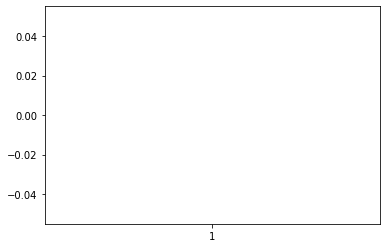

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(df_class['cty'])

In [13]:
# 이상치 확인을 위해 boxplot을 실행했지만 아무런 결과도 나타나지 않았다.
# 이는 결측치가 존재하여 나타날수 있는 문제이다.

In [14]:
cty_series.isnull().sum()

NameError: name 'cty_series' is not defined

In [ ]:
# 8개가 존재함

In [ ]:
# notnull 로 결측치가 배제된 데이터만 뽑음

cty_series = df_class['cty']
cty_series[cty_series.notnull()]


In [ ]:
plt.boxplot(cty_series[cty_series.notnull()])

In [ ]:
# 0 이하 값과 1000 이상의 값이 이상치로 확인됨

In [ ]:
cty_series[cty_series.notnull()].describe()

In [ ]:
import numpy as np

cty_series_notnull = cty_series[cty_series.notnull()]
q1, q3 = np.percentile(cty_series_notnull, [25, 75])

iqr = q3 - q1

cty_lowerfence = q1 - iqr*1.5
cty_upperfence = q3 + iqr*1.5

print(cty_lowerfence)
print(cty_upperfence)

In [ ]:
df_class[df_class['cty']<cty_lowerfence]

In [ ]:
df_class[df_class['cty']>cty_upperfence]

In [ ]:
cty_upperfence = q3+iqr*3
cty_upperfence

In [ ]:
df_class[df_class['cty']>cty_upperfence]

In [ ]:
df_class[df_class['class']=='suv']
df_class[df_class['hwy']==15]

df_class[(df_class['class']=='suv')&(df_class['hwy']==15)]

In [ ]:
df_class_suv_15 = df_class[(df_class['class']=='suv')&(df_class['hwy']==15)]
df_class_suv_15.describe()

In [ ]:
df_class_suv_15.median()

#  -50 때문에 평균은 사용할수 없으니 중앙값으로 대체한다. 50% = median 

In [ ]:
className = 'suv'
mpg = '20'

df1 = pd.DataFrame()
df1 = df1.append({
    'class':className,
    'cty':999,
    'hwy':mpg
}, ignore_index=True)
df1 = df1.append({
    'class':className,
    'cty':999,
    'hwy':mpg
}, ignore_index=True)
df1 = df1.append({
    'class':className,
    'cty':11,
    'hwy':mpg
}, ignore_index=True)
df1 = df1.append({
    'class':className,
    'cty':-50,
    'hwy':mpg
}, ignore_index=True)

df1

In [ ]:
target = 'cty'
lower = 0
upper = 100

boolupper = df1[target]>upper
boollower = df1[target]<lower

df1[boolupper|boollower]

In [ ]:
for val in df1[boolupper|boollower]:
    print(val)

In [ ]:
print(df1[boolupper | boollower])
df1_drop_duplicates = df1[boolupper | boollower].drop_duplicates(target)
df1_drop_duplicates

In [ ]:
min = 11

for val in df1_drop_duplicates[target]:
    df1 = df1.replace({target:val}, {target:min})

df1

In [ ]:
className = 'suv'
mpg=15

df['class']==className
df['hwy']==mpg

bool_target = (df['class']==className)&(df['hwy']==mpg)
df[bool_target]

In [ ]:
df_sample.describe()

In [ ]:
df_sample = df[bool_target]
median = np.median(df_sample['cty'])
median

In [ ]:
def ConvertAbnormality(data_frame, className, mpg):
    bool_target = (data_frame['class']==className) & (data_frame['hwy']==mpg)
    df_sample = data_frame[bool_target]
    median = np.median(df_sample['cty'])
    print(median)


In [ ]:
ConvertAbnormality(df, 'suv', 15)

In [ ]:
lower = 0
upper = 100

bool_upper = df_sample['cty']>upper
bool_lower = df_sample['cty']<lower

df_drop = df_sample[bool_lower|bool_upper].drop_duplicates('cty')

In [ ]:
df_drop

In [ ]:
def Convert(data_frame, className, mpg, lower, upper):
    # 중간값 구하기
    bool_target = (data_frame['class']==className)&(data_frame['hwy']==mpg)
    df_sample = data_frame[bool_target]
    median = np.median(df_sample['cty'])
    
    # 중복 제거
    bool_upper = df_sample['cty']>upper
    bool_lower = df_sample['cty']<lower
    
    df_drop = df_sample[bool_lower | bool_upper].drop_duplicates('cty')
    
    # 이상치 치환
    for val in df_drop['cty']:
        data_frame[bool_target] = data_frame[bool_target].replace({'cty':val}, {'cty':median})
        
    return data_frame

df2 = Convert(df, 'midsize', 29.0, 0, 100)

df2

In [15]:
# 이상치 제거 목록 만들기

In [16]:
lowerfence = 0
upperfence = 100

df_lower = df_class[df_class['cty']<lowerfence]
df_upper = df_class[df_class['cty']>upperfence]

print(df_lower)
print(df_upper)

   class   cty   hwy
63   suv -50.0  15.0
          class    cty   hwy
106  subcompact  999.0  36.0
156     midsize  999.0  27.0
230     midsize  999.0  29.0


In [25]:
df_abnormality = df_class[(df_class['cty']<lowerfence) | (df_class['cty']>upperfence)]
df_abnormality

,class,cty,hwy
63,suv,-50.0,15.0
106,subcompact,999.0,36.0
156,midsize,999.0,27.0
230,midsize,999.0,29.0


In [27]:
# 두 데이터프레임을 concat으로 합친다

df_abnormality = pd.concat([df_lower, df_upper])
df_abnormality


,class,cty,hwy
63,suv,-50.0,15.0
106,subcompact,999.0,36.0
156,midsize,999.0,27.0
230,midsize,999.0,29.0


In [30]:
# intterrows() 함수는 index와 row 정보를 전달한다.
# 인덱스와 각 행의 전달

for idx, row in df_abnormality.iterrows():
    print(idx)
    print(row)
    print('==========================')

63
class     suv
cty     -50.0
hwy      15.0
Name: 63, dtype: object
106
class    subcompact
cty           999.0
hwy            36.0
Name: 106, dtype: object
156
class    midsize
cty        999.0
hwy         27.0
Name: 156, dtype: object
230
class    midsize
cty        999.0
hwy         29.0
Name: 230, dtype: object
